###    REGRESSÃO LINEAR MÚLTIPLA
    Exemplo: Estimar o valor de venda de um imóvel em função das características do imóvel: área em m2, quantidade de dormitórios,
    quantidade de suítes, andar, varanda gourmet, área verde nas proximidades, distância de metrô ou transporte público, etc

Estimar o valor de imóveis a partir de características  disponibilizadas:

Variáveis:

Valor do Imóvel [Valor]: Valor do imóvel

Área [Area]: Utilizou-se a área total do apartamento em metros quadrados;

Idade Aparente [IA]: Idade aparente em anos

Andar [Andar]: É o número do andar do apartamento;

Suítes [Suites]: Número de suítes;

Vista Panorâmica [Vista]: A variável ambiental vista panorâmica é uma variável dicotômica: se o apartamento tiver vista panorâmica a variável vista assume valor igual a 1, se não tiver vista seu valor será 0;

Sem Ruído na rua [Sem Ruído]: A variável ambiental Sem Ruído é uma variável dicotômica: se o apartamento está localizado em rua onde o nível de ruído está abaixo do que é considerado não prejudicial terá valor 1, se tiver nível de ruído acima terá valor 0;

Distância a Avenida Beira Mar [Dist. BM]: A distância é medida em metros, pelo eixo da rua do prédio onde os apartamentos estão localizados até a Avenida Beira Mar;

Área Verde a uma distância de 200 metros [AV 200m]: Área verde a uma distância de 200 metros assume valor igual a 1, ultrapassando 200 metros assume valor 0.

In [1]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# lendo a base de dados
imoveis= pd.read_csv(r'Arquivo_Valorizacao_Ambiental.csv', sep=';')


In [5]:
# visualizando alguns dados
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [7]:
# visualizando formatos das variáveis
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [9]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(imoveis.isnull().sum(),imoveis.isnull().sum()/len(imoveis)), columns=['Count', 'Proportion'], index=imoveis.columns)


,Count,Proportion
Ordem,0,0.0
Valor,0,0.0
Area,0,0.0
IA,0,0.0
Andar,0,0.0
Suites,0,0.0
Vista,0,0.0
DistBM,0,0.0
Semruido,0,0.0
AV100m,0,0.0


In [11]:
# descritivo das variáveis: medidas resumo
imoveis.describe().round(2) 


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


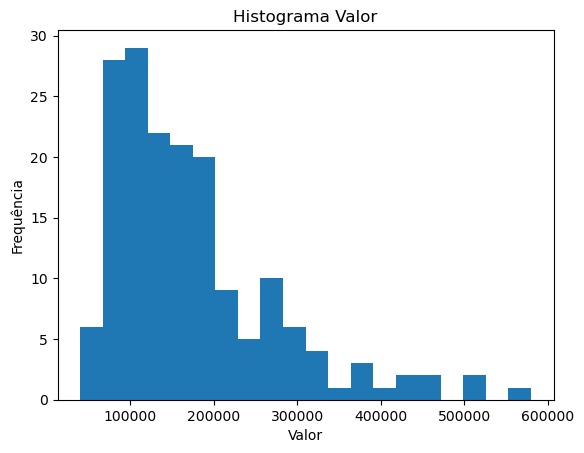

In [13]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar

plt.hist(imoveis['Valor'], bins=20)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Valor');



In [15]:
imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])

Text(0.5, 1.0, 'Histograma raiz_valor')

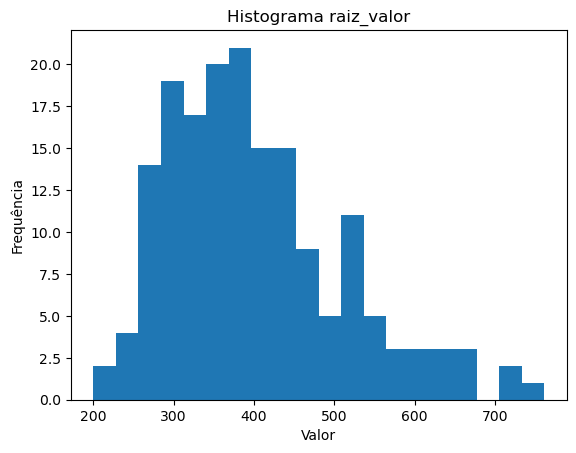

In [17]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar

plt.hist(imoveis['raiz_valor'], bins=20)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma raiz_valor')

Text(0, 0.5, 'Número de casos')

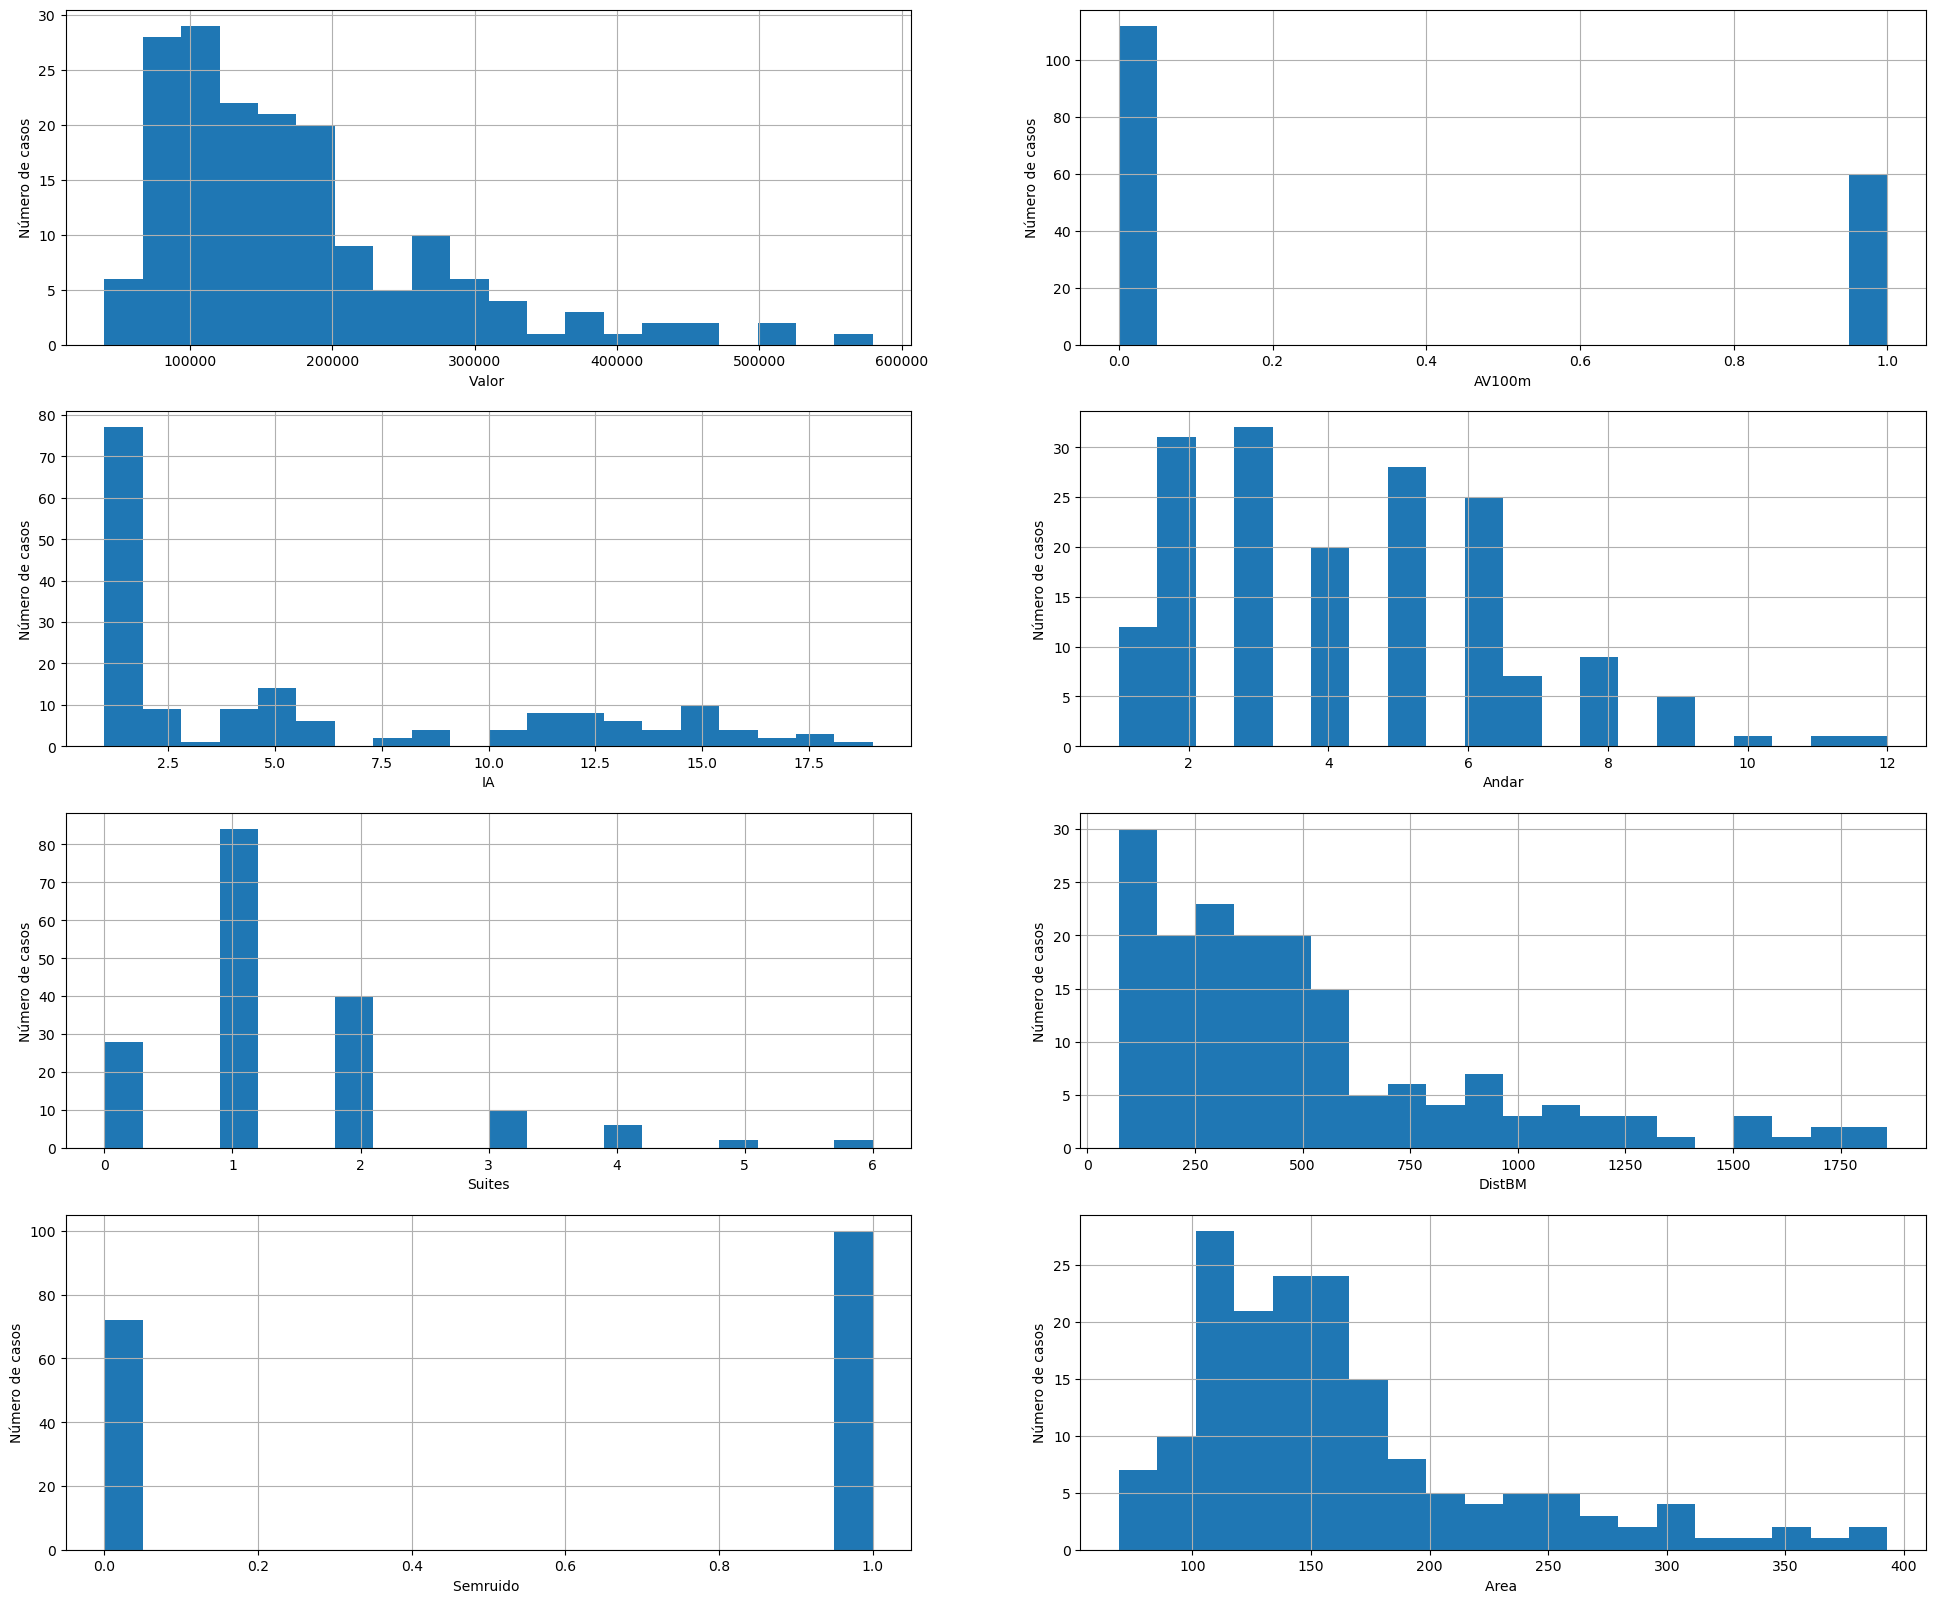

In [19]:
# avaliando a distribuicaoo de cada variavel numérica 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis['Valor'].hist(bins=20)
fig.set_xlabel('Valor ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 2)
fig = imoveis['AV100m'].hist(bins=20)
fig.set_xlabel('AV100m')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 3)
fig = imoveis['IA'].hist(bins=20)
fig.set_xlabel('IA')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 4)
fig = imoveis['Andar'].hist(bins=20)
fig.set_xlabel('Andar')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 5)
fig = imoveis['Suites'].hist(bins=20)
fig.set_xlabel('Suites')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 6)
fig = imoveis['DistBM'].hist(bins=20)
fig.set_xlabel('DistBM')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 7)
fig = imoveis['Semruido'].hist(bins=20)
fig.set_xlabel('Semruido ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 8)
fig = imoveis['Area'].hist(bins=20)
fig.set_xlabel('Area ')
fig.set_ylabel('Número de casos')


Text(0, 0.5, 'Suites')

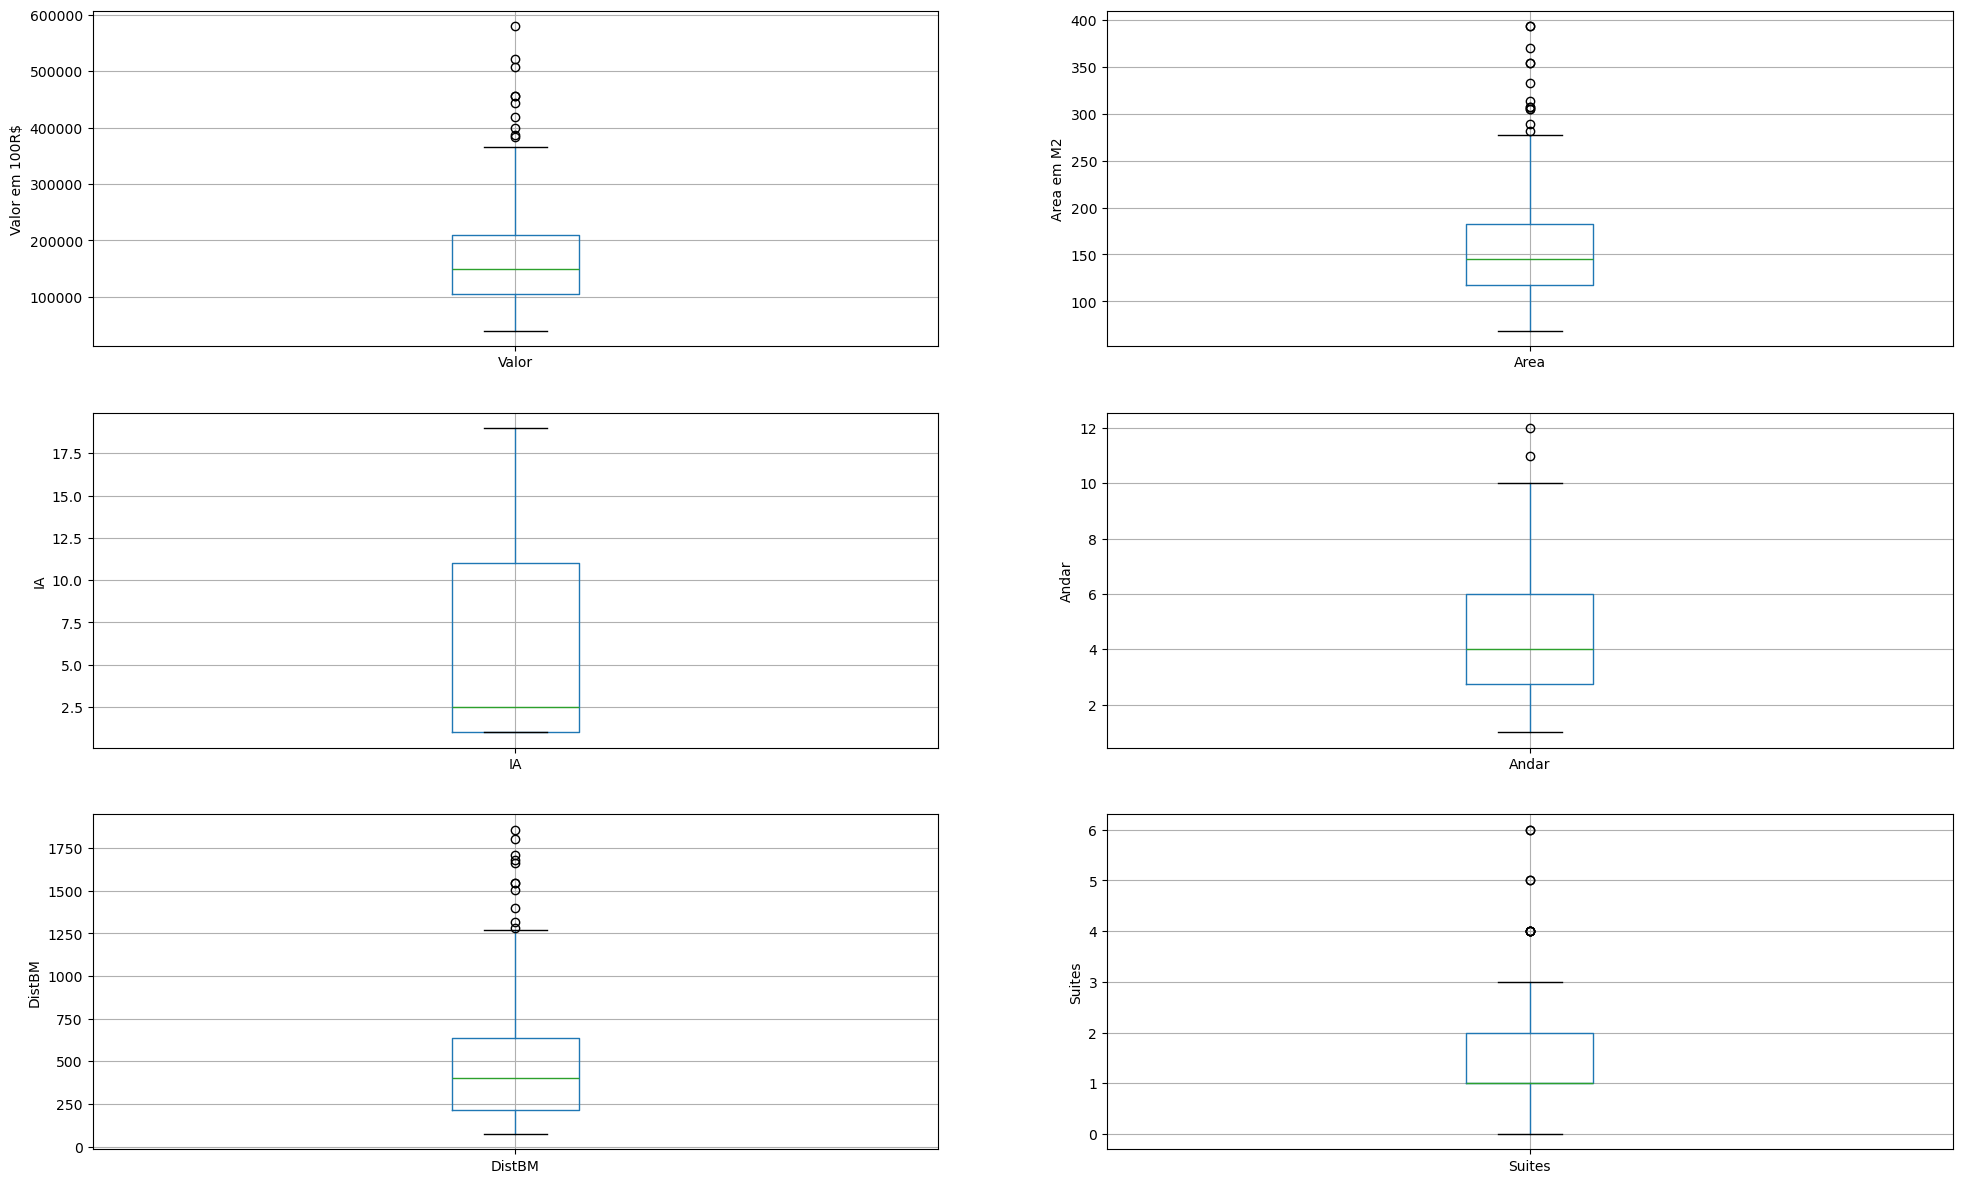

In [21]:
# Outra opção para variáveis quantitativas Boxplot: para visualizar Outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em 100R$')

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em M2')

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('IA')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('DistBM')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Suites')




In [ ]:
# Importante nessa etapa é avaliar se tem alguma variável com presença de outliers ou daados extremos
# Antes de ir para a correlação avaliar o que fazer!!!!!!!!!!!corrigir, eliminar....

In [23]:
# excluindo variáveis que não são necessárias
imoveis = imoveis.drop(['Ordem', 'raiz_valor'], axis = 1)
imoveis.head() 

,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,160000,168,1,5,1,1,294,1,0
1,67000,129,1,6,0,0,1505,1,0
2,190000,218,1,8,1,0,251,0,1
3,110000,180,12,4,1,0,245,0,0
4,70000,120,15,3,1,0,956,1,0


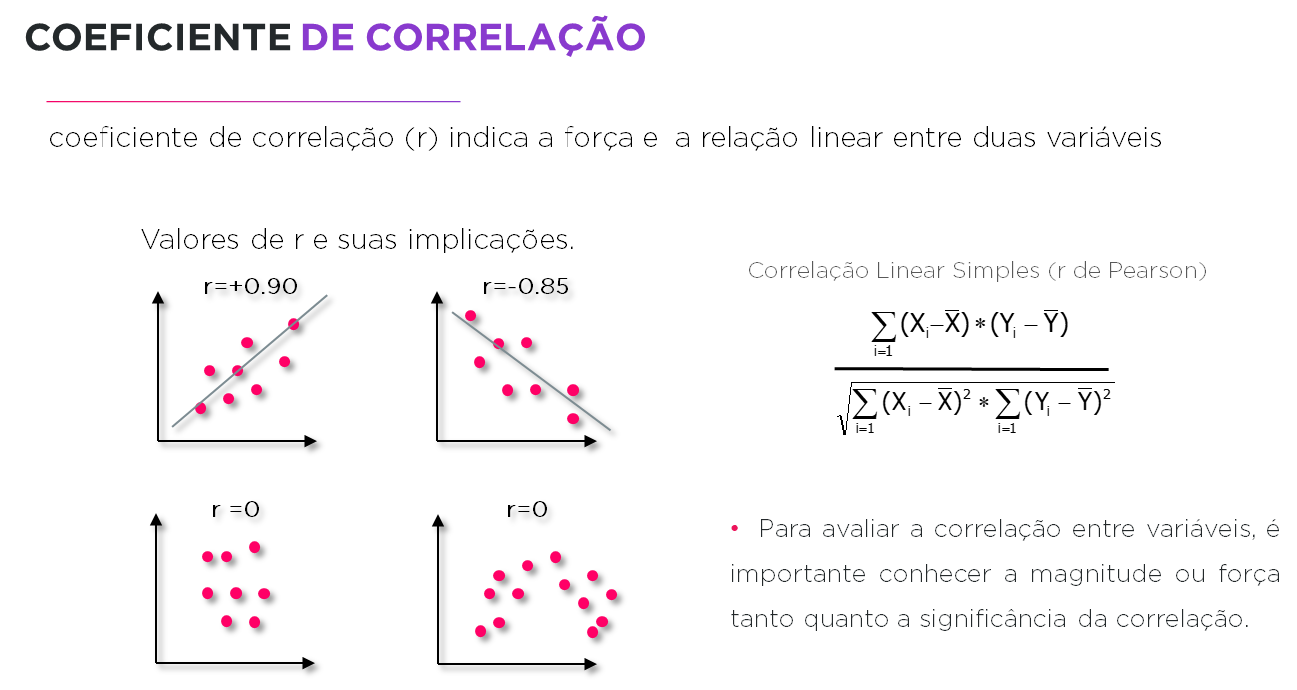

In [25]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

imoveis.corr().round(2)

,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
Valor,1.00,0.77,-0.33,0.31,0.72,0.27,-0.05,0.22,0.37
Area,0.77,1.00,-0.15,0.16,0.53,0.09,-0.12,0.11,0.30
IA,-0.33,-0.15,1.00,-0.38,-0.32,-0.01,-0.01,-0.14,-0.14
Andar,0.31,0.16,-0.38,1.00,0.23,0.01,0.25,0.02,0.22
Suites,0.72,0.53,-0.32,0.23,1.00,0.04,-0.11,0.12,0.25
Vista,0.27,0.09,-0.01,0.01,0.04,1.00,-0.10,0.04,0.34
DistBM,-0.05,-0.12,-0.01,0.25,-0.11,-0.10,1.00,0.40,-0.10
Semruido,0.22,0.11,-0.14,0.02,0.12,0.04,0.40,1.00,0.23
AV100m,0.37,0.30,-0.14,0.22,0.25,0.34,-0.10,0.23,1.00


In [27]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
corr = imoveis.corr(method='pearson')
corr

,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
Valor,1.000000,0.772846,-0.325379,0.307248,0.722929,0.271163,-0.053489,0.221166,0.370780
Area,0.772846,1.000000,-0.153889,0.162306,0.527777,0.086575,-0.123760,0.107167,0.295078
IA,-0.325379,-0.153889,1.000000,-0.379168,-0.319479,-0.007518,-0.009442,-0.143307,-0.144353
Andar,0.307248,0.162306,-0.379168,1.000000,0.233648,0.014152,0.248249,0.017672,0.219631
Suites,0.722929,0.527777,-0.319479,0.233648,1.000000,0.037509,-0.113931,0.120263,0.252755
Vista,0.271163,0.086575,-0.007518,0.014152,0.037509,1.000000,-0.095942,0.035593,0.338953
DistBM,-0.053489,-0.123760,-0.009442,0.248249,-0.113931,-0.095942,1.000000,0.402139,-0.104872
Semruido,0.221166,0.107167,-0.143307,0.017672,0.120263,0.035593,0.402139,1.000000,0.225421
AV100m,0.370780,0.295078,-0.144353,0.219631,0.252755,0.338953,-0.104872,0.225421,1.000000


#### Observação muito cuidado com a análise de correlação em variáveis que são do tipo categórica 
####  e que foram transformadas m variáveis numéricas (tipo dummy)

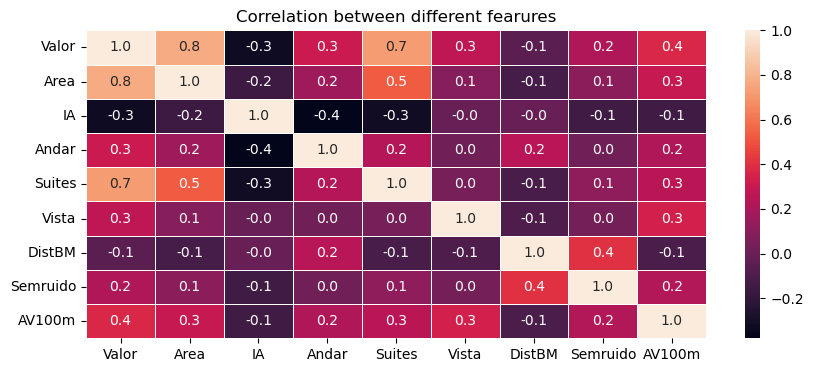

In [29]:
correlation = imoveis.corr()
plt.figure(figsize=(10,4))
#sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis',fmt=".1f", linewidths=.6)
sb.heatmap(correlation, annot=True,fmt=".1f", linewidths=.6)
plt.title('Correlation between different fearures');


### Na análise descritiva sempre utilizar a variável Target - de acordo com o objetivo

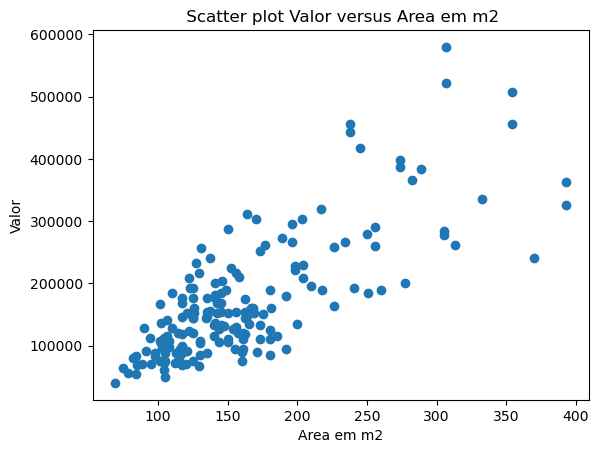

In [31]:
# gráfico quando a variável preditora quantitativa 

# Gráfico de dispersão ou scatterplot
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel("Area em m2")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Area em m2");

Percebam que quanto maior o área do imovel maior o valor em média....

Text(0.5, 4.444444444444281, 'Suites')

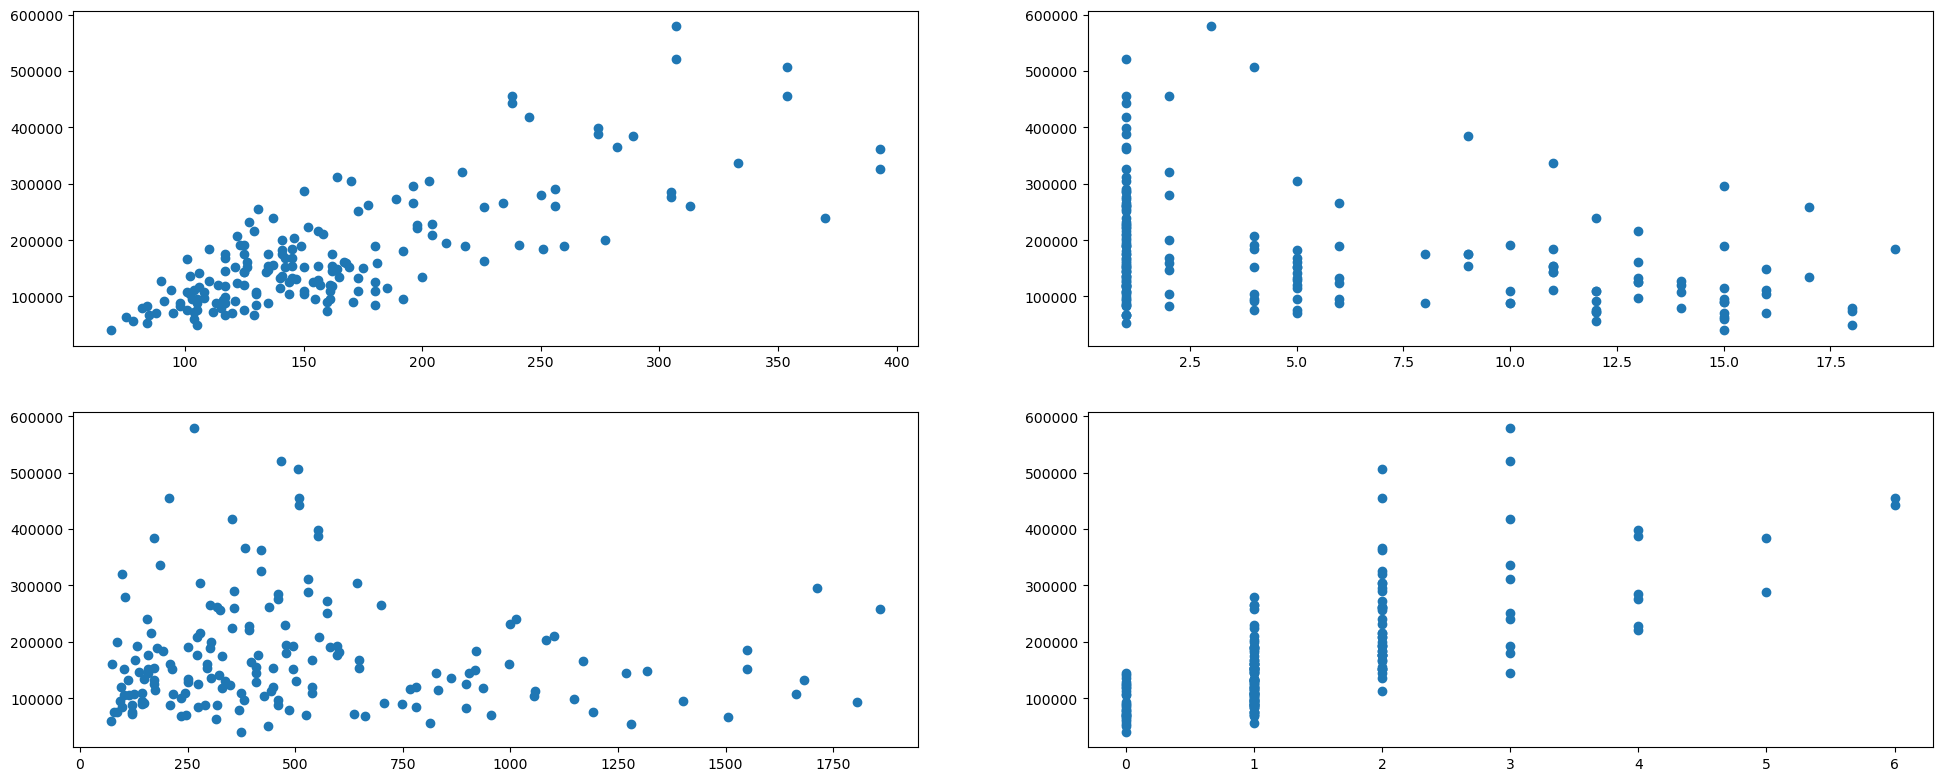

In [33]:
# Variáveis Preditoras/Independentes quantitativas com a variável Target


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)

plt.scatter(imoveis['Area'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Area')

plt.subplot(4, 2, 2)

plt.scatter(imoveis['IA'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Idade Aparente')


plt.subplot(4, 2, 3)

plt.scatter(imoveis['DistBM'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('DistBM')


plt.subplot(4, 2, 4)

plt.scatter(imoveis['Suites'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Suites')


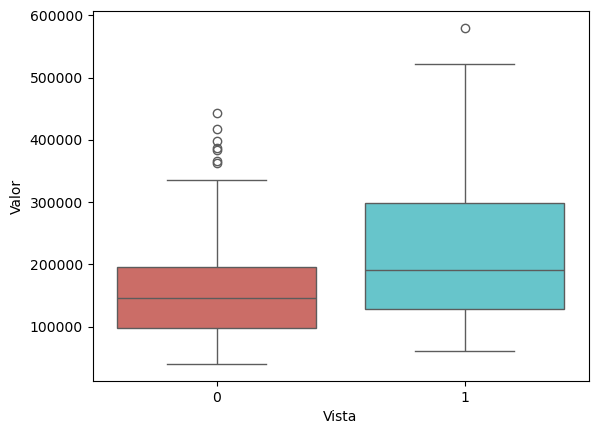

In [35]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Valor versus a variável Vista
sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls');

Veja no gráfico acima que os valores dos imoveis que possuem Vista Panorâmica são: maiores..............

<Axes: xlabel='Semruido', ylabel='Valor'>

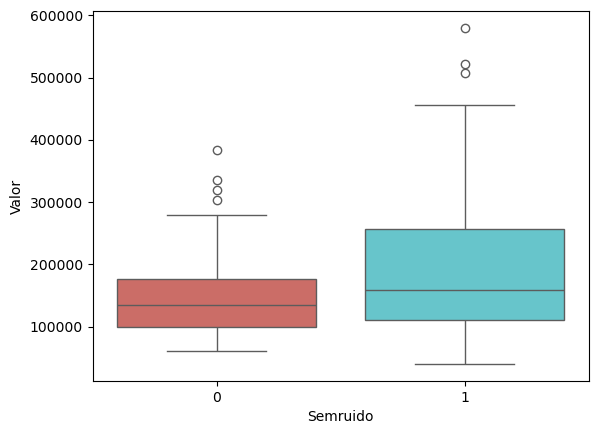

In [37]:
# Boxplot da variável Valor versus a variável Semruido
sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

<Axes: xlabel='AV100m', ylabel='Valor'>

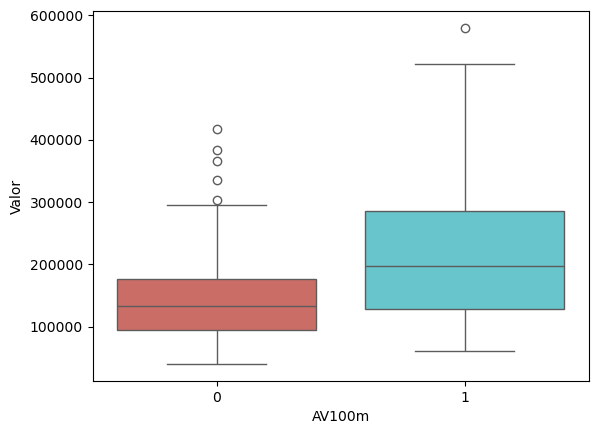

In [39]:
# Boxplot da variável Valor versus a variável AV100m
sb.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')

#### Uma observação:
     Nesta base que estamos utilizando as variáveis categóricas já foram transformadas em variáveis númericas do tipo dummy
 

In [ ]:
# Teste qui-quadrado é utilizado para descobrir associação entre duas variáveis qualitativas
# transformar a variável Valor do Imovel em qualitativa --> faixa valor (qualitativa ordinal) vs Semruido(qualitativa nominal)
# criar a faixa_vlr você usar os quartis 

In [41]:
# Criar uma variável categórica
Q1 =  np.percentile(imoveis['Valor'], 25)
Q2 =  np.percentile(imoveis['Valor'], 50)
Q3 =  np.percentile(imoveis['Valor'], 75)
maximo = max(imoveis['Valor'])    
print(Q1, Q2, Q3, maximo)


104750.0 149000.0 209250.0 579840


In [43]:
imoveis.loc[(imoveis.Valor >= 0) & (imoveis.Valor <= Q1), 'fx_total']=1.0
imoveis.loc[(imoveis.Valor > Q1) & (imoveis.Valor <= Q2), 'fx_total']=2.0
imoveis.loc[(imoveis.Valor>  Q2)  & (imoveis.Valor <=Q3), 'fx_total']=3.0
imoveis.loc[(imoveis.Valor >  Q3) & (imoveis.Valor <= maximo), 'fx_total']=4.0

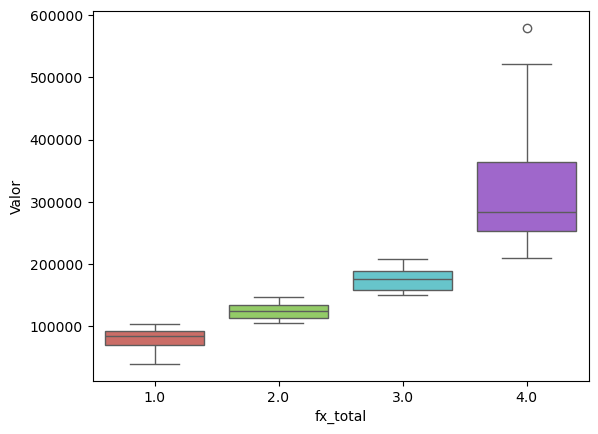

In [45]:
# Boxplot da variável Valor versus a variável categoria de valor
sb.boxplot(x='fx_total', y='Valor', data=imoveis, palette='hls');

In [47]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Valor     172 non-null    int64  
 1   Area      172 non-null    int64  
 2   IA        172 non-null    int64  
 3   Andar     172 non-null    int64  
 4   Suites    172 non-null    int64  
 5   Vista     172 non-null    int64  
 6   DistBM    172 non-null    int64  
 7   Semruido  172 non-null    int64  
 8   AV100m    172 non-null    int64  
 9   fx_total  172 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 13.6 KB


In [49]:
# crosstab tabela cruzada entre duas variáveis qualitativas

table = pd.crosstab(imoveis.fx_total,imoveis.Semruido)

In [51]:
print(table)

Semruido   0   1
fx_total        
1.0       20  23
2.0       22  21
3.0       21  22
4.0        9  34


In [53]:
# crosstab tabela cruzada entre duas variáveis qualitativas com total 

pd.crosstab(imoveis.fx_total,imoveis.Semruido, margins=True)

Semruido,0,1,All
fx_total,,,
1.0,20,23,43
2.0,22,21,43
3.0,21,22,43
4.0,9,34,43
All,72,100,172


### Os valores encontrados na tabela acima são os valores observados 

In [55]:
# Uma variável categórica  sem_ruído
(imoveis.Semruido.value_counts() / imoveis.shape[0]) * 100

Semruido
1    58.139535
0    41.860465
Name: count, dtype: float64

#### Na hipótese de não ter diferença entre a variável "faixas de valores" e a variável "Sem ruído"
#### espera-se que o percentual de ter ou não ruído seja a mesma do total para cada faixa de valor

####   Teste de hipótese:
    H0: não há relação entre valor e ruído
    H1: há relação entre valor e ruído
    α = 0,05 (5%)

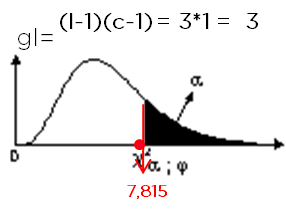

In [57]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
!pip install researchpy
import researchpy

In [59]:
results1 = researchpy.crosstab(imoveis['fx_total'],imoveis['Semruido'], test='chi-square')

In [61]:
# Resultado Teste chi-Quadrado 
#   H0: não há relação entre valor e ruído
#   H1: há relação entre valor e ruído
#   α = 0,05 (5%)


results1

(         Semruido          
 Semruido        0    1  All
 fx_total                   
 1.0            20   23   43
 2.0            22   21   43
 3.0            21   22   43
 4.0             9   34   43
 All            72  100  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   10.5111
 1                    p-value =    0.0147
 2                 Cramer's V =    0.2472)

### o p-value no teste chiquadrado se for menor que 0.05 não aceita-se Ho

In [63]:
# Resultado Teste chi-Quadrado 
#   H0: não há relação entre valor e ter vista
#   H1: há relação entre valor e ter vista
#   α = 0,05 (5%)

results2 = researchpy.crosstab(imoveis['fx_total'],imoveis['Vista'], test='chi-square')
results2


(         Vista         
 Vista        0   1  All
 fx_total               
 1.0         41   2   43
 2.0         36   7   43
 3.0         39   4   43
 4.0         32  11   43
 All        148  24  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    8.9099
 1                    p-value =    0.0305
 2                 Cramer's V =    0.2276)

In [65]:
# Resultado Teste chi-Quadrado 
#   H0: não há relação entre valor e area verde 
#   H1: há relação entre valor e ter área verde
#   α = 0,05 (5%)


results3 = researchpy.crosstab(imoveis['fx_total'],imoveis['AV100m'], test='chi-square')
results3

(         AV100m         
 AV100m        0   1  All
 fx_total                
 1.0          36   7   43
 2.0          30  13   43
 3.0          31  12   43
 4.0          15  28   43
 All         112  60  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   25.1857
 1                    p-value =    0.0000
 2                 Cramer's V =    0.3827)

####  Caso tenha uma variável preditora quantitativa que queira criar categorias

In [67]:
# Avaliando a variável Distancia do Imovel do Mar
Q1 =  np.percentile(imoveis['DistBM'], 25)
Q2 =  np.percentile(imoveis['DistBM'], 50)
Q3 =  np.percentile(imoveis['DistBM'], 75)
maximo = max(imoveis['DistBM'])    
print(Q1, Q2, Q3, maximo)

214.75 402.5 638.0 1859


In [69]:
imoveis.loc[(imoveis.DistBM >= 0) & (imoveis.DistBM <= Q1), 'fx_DistBM']=1.0
imoveis.loc[(imoveis.DistBM > Q1) & (imoveis.DistBM <= Q2), 'fx_DistBM']=2.0
imoveis.loc[(imoveis.DistBM>  Q2)  & (imoveis.DistBM <=Q3), 'fx_DistBM']=3.0
imoveis.loc[(imoveis.DistBM >  Q3) & (imoveis.DistBM <= maximo), 'fx_DistBM']=4.0

In [71]:
imoveis.loc[(imoveis.DistBM >= 0) & (imoveis.DistBM <= 600), 'fx_DistBM']=0.0

imoveis.loc[(imoveis.DistBM >  600) & (imoveis.DistBM <= maximo), 'fx_DistBM']=1.0

<Axes: xlabel='fx_DistBM', ylabel='DistBM'>

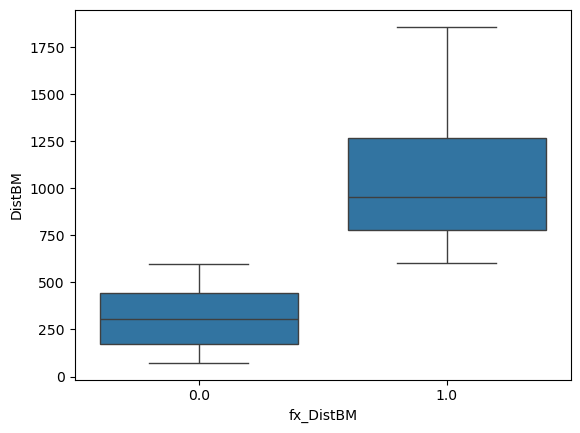

In [73]:
# Boxplot da variável Valor versus a variável categoria de valor
sb.boxplot(x='fx_DistBM', y='DistBM', data=imoveis)

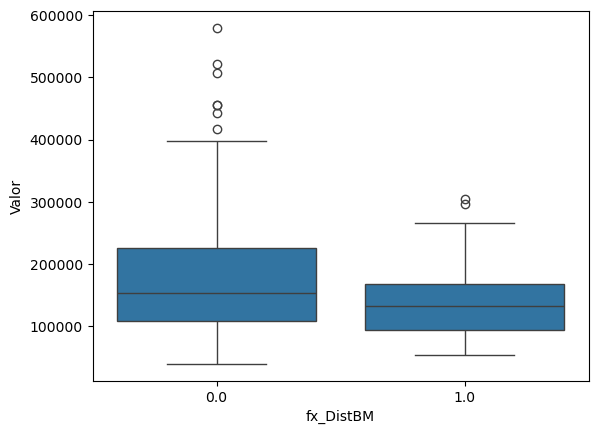

In [75]:
# Boxplot da variável Valor versus a variável categoria de valor
sb.boxplot(x='fx_DistBM', y='Valor', data=imoveis);

In [77]:
# Resultado Teste chi-Quadrado 
#   H0: não há relação entre valor e distancia beira mar
#   H1: há relação entre valor e distancia beira mar
#   α = 0,05 (5%)

results4 = researchpy.crosstab(imoveis['fx_total'],imoveis['fx_DistBM'], test='chi-square')
results4

(          fx_DistBM         
 fx_DistBM       0.0 1.0  All
 fx_total                    
 1.0              28  15   43
 2.0              30  13   43
 3.0              33  10   43
 4.0              36   7   43
 All             127  45  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    4.4241
 1                    p-value =    0.2192
 2                 Cramer's V =    0.1604)

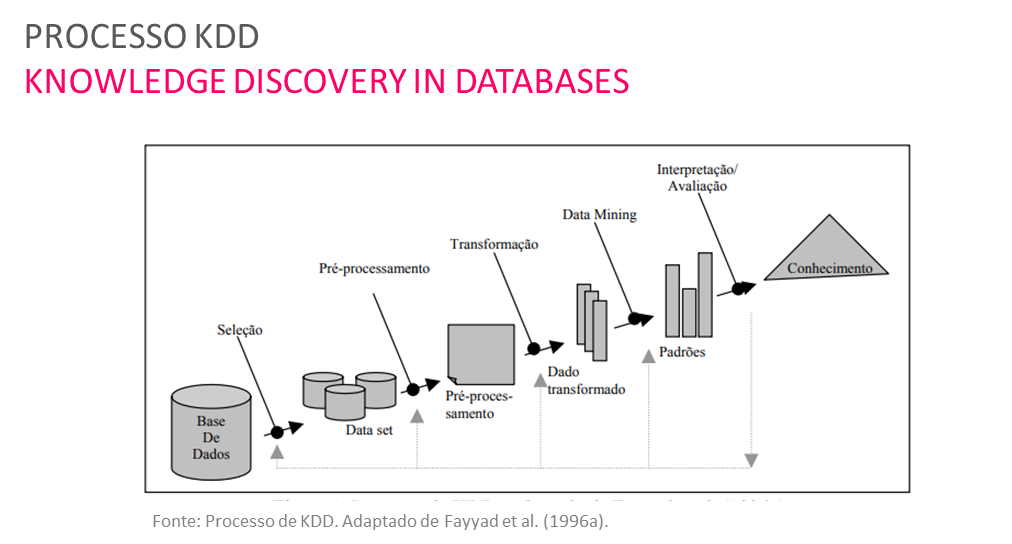

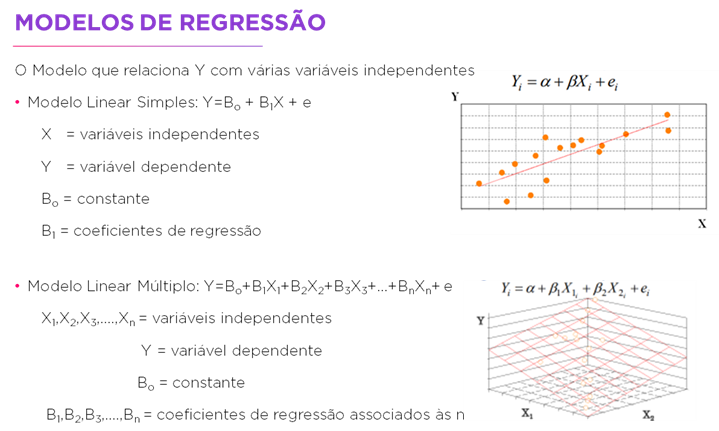

In [ ]:
Estou aqui!!!

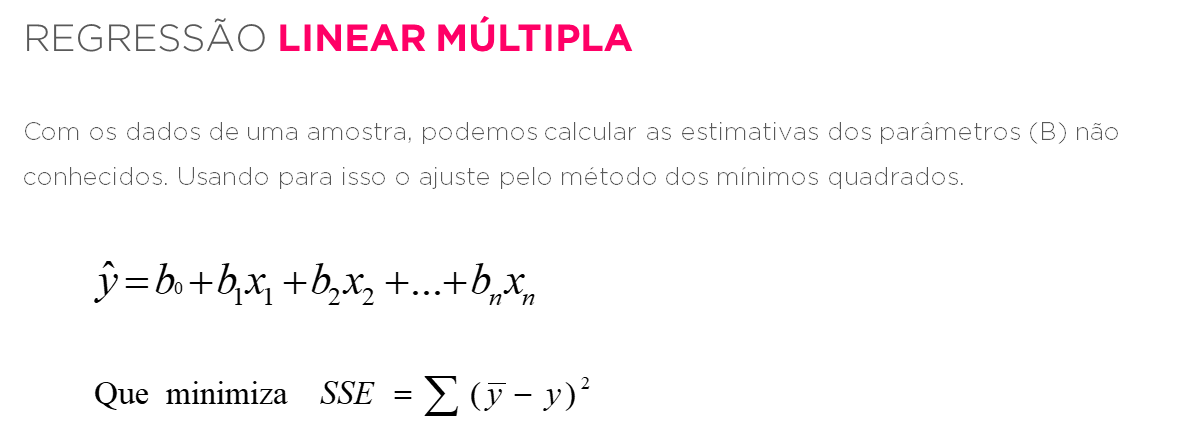

In [79]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valor      172 non-null    int64  
 1   Area       172 non-null    int64  
 2   IA         172 non-null    int64  
 3   Andar      172 non-null    int64  
 4   Suites     172 non-null    int64  
 5   Vista      172 non-null    int64  
 6   DistBM     172 non-null    int64  
 7   Semruido   172 non-null    int64  
 8   AV100m     172 non-null    int64  
 9   fx_total   172 non-null    float64
 10  fx_DistBM  172 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 14.9 KB


####  Passos após a etapa de pré processamento e preparação da base 

In [81]:

X = imoveis[imoveis.columns[1:9]]

y = imoveis['Valor']

In [87]:
X

,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,168,1,5,1,1,294,1,0
1,129,1,6,0,0,1505,1,0
2,218,1,8,1,0,251,0,1
3,180,12,4,1,0,245,0,0
4,120,15,3,1,0,956,1,0
...,...,...,...,...,...,...,...,...
167,82,14,2,0,0,485,1,0
168,134,11,2,0,1,827,1,1
169,135,9,3,2,1,414,1,1
170,141,1,6,2,0,305,0,0


In [85]:
y

0      160000
1       67000
2      190000
3      110000
4       70000
        ...  
167     80000
168    144000
169    176000
170    199956
171    144000
Name: Valor, Length: 172, dtype: int64

In [89]:
# Importar as bibliotecas
from sklearn.model_selection import train_test_split

# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 17)

In [91]:
X_train

,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
97,354,4,6,2,1,506,1,1
73,137,1,5,2,0,408,1,1
101,274,1,5,4,0,554,1,1
138,145,11,5,2,0,920,0,0
112,145,1,5,1,0,648,1,0
...,...,...,...,...,...,...,...,...
57,198,1,4,4,0,392,1,1
150,141,1,2,2,0,305,0,0
134,125,14,3,0,1,95,0,1
143,238,1,5,6,0,510,1,1


     Primeira Biblioteca
     
https://www.statsmodels.org/stable/index.html

In [93]:
# importar bibliotecas
import statsmodels.api as sm
from scipy import stats

### sm.add_constant(X)"

#### É usado para adicionar um termo constante a um conjunto de dados X.

#### Este termo constante é adicionado para permitir que os modelos estimem um termo de interceptação.



#####  Ao ajustar um modelo de regressão linear, se você não incluir explicitamente um termo constante em seus dados, o modelo 

##### assumirá que não há interceptação. No entanto, em muitos casos, geralmente há uma interceptação diferente de zero.



##### Ao adicionar um termo constante usando sm.add_constant(X), estamos adicionando uma coluna de 1s ao seu conjunto de dados X, 

##### o que permite ao modelo estimar também o termo de interceptação.

In [95]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares

X_ = sm.add_constant(X_train)
 
X_

,const,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
97,1.0,354,4,6,2,1,506,1,1
73,1.0,137,1,5,2,0,408,1,1
101,1.0,274,1,5,4,0,554,1,1
138,1.0,145,11,5,2,0,920,0,0
112,1.0,145,1,5,1,0,648,1,0
...,...,...,...,...,...,...,...,...,...
57,1.0,198,1,4,4,0,392,1,1
150,1.0,141,1,2,2,0,305,0,0
134,1.0,125,14,3,0,1,95,0,1
143,1.0,238,1,5,6,0,510,1,1


In [97]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares


model_OLS = sm.OLS(y_train, X_).fit()

print(model_OLS.summary())




                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     83.27
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           5.22e-52
Time:                        20:43:38   Log-Likelihood:                -1972.7
No. Observations:                 163   AIC:                             3963.
Df Residuals:                     154   BIC:                             3991.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.283e+04   1.43e+04     -2.293      0.0

Na análise de regressão os coeficientes (coef)
os coeficientes são estimativas dos parâmetros populacionais reais.
Queremos que essas estimativas de coeficientes sejam as melhores estimativas possíveis!

In [99]:
# Voltando na base
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valor      172 non-null    int64  
 1   Area       172 non-null    int64  
 2   IA         172 non-null    int64  
 3   Andar      172 non-null    int64  
 4   Suites     172 non-null    int64  
 5   Vista      172 non-null    int64  
 6   DistBM     172 non-null    int64  
 7   Semruido   172 non-null    int64  
 8   AV100m     172 non-null    int64  
 9   fx_total   172 non-null    float64
 10  fx_DistBM  172 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 14.9 KB


### Selecionando as variáveis significantes

In [101]:
# Selecionando as variáveis significantes

X_train, X_test, y_train, y_test = train_test_split(imoveis.drop(['Valor', 'DistBM', 'AV100m','fx_total','fx_DistBM'],axis=1),imoveis['Valor'],test_size=0.05, random_state=17)


In [103]:
X_train

,Area,IA,Andar,Suites,Vista,Semruido
97,354,4,6,2,1,1
73,137,1,5,2,0,1
101,274,1,5,4,0,1
138,145,11,5,2,0,0
112,145,1,5,1,0,1
...,...,...,...,...,...,...
57,198,1,4,4,0,1
150,141,1,2,2,0,0
134,125,14,3,0,1,0
143,238,1,5,6,0,1


In [105]:
y_train

97     507360
73     156000
101    398477
138    184000
112    168000
        ...  
57     221496
150    136000
134    120000
143    442992
111    154000
Name: Valor, Length: 163, dtype: int64

In [107]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares

X_ = sm.add_constant(X_train)

model_fim = sm.OLS(y_train, X_).fit()

print(model_fim.summary())


                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     112.3
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           4.98e-54
Time:                        20:43:49   Log-Likelihood:                -1972.7
No. Observations:                 163   AIC:                             3959.
Df Residuals:                     156   BIC:                             3981.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.319e+04   1.39e+04     -2.392      0.0

    Na saída da regressão linear as medidas mais importantes para nós neste momento são o R2 ajustado, a estatística de teste F, o p-valor dessa estatística e, caso queiramos comparar diferentes modelos, o log-likelihood, o Akaike Information Criterion (AIC) e o Bayesian Information Criterion (BIC).
    
    A avaliação da qualidade de ajuste da reta de regressão que é obtida atráves de Soma de Quadrados de Resíduos (SQR) e R2 RQuadrado). Também, pode-se usar a estatística F que é usado para testar se pelo menos uma variável preditora possui um coeficiente diferente de zero.
    TESTANDO O MODELO PREDITIVO DE Y
	Ho: B1 = B2 = B3 = ... = Bn
	H1: pelo menos um B não é zero	
    
    Coeficiente de Determinação (R2)
    O coeficiente de determinação ou R2, mede a proporção de variabilidade total em Y que pode ser explicada pela reta de regressão linear com as variáveis preditoras, e assume sempre valores de 0 e 1. Se R2 é proximo de 1, indica que uma grande proporção da variabilidade na resposta foi explicada pela regressão e ´quando R2 é próximo de 0 indica que a regressão não explicou grande parte da variabilidade na resposta.

    Neste estudo, R2= 0.805, 81% da variação total do valor do imóvel é explicada pela equação de regressão estimada tendo as variáveis explicativas ami.a.

    TESTANDO OS PARÂMETROSs:      
HB´s=0      0
H´s#01 i #    é calculado a estatistica t para cada variável predai a.
    se  P>|t|  (p-value) for <0.05 rejeito a hipótese nula, a variável é significante para estimar a variável targ t. 0


In [115]:
# Importar a biblioteca
# Medidas de erro 

# Utilizado quando vamos comparar vários modelos

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [109]:
# Calculando o valor predito da variável resposta na amostra treino  
y_train_pred = model_fim.predict(X_)


In [111]:
y_train_pred

97     411289.841286
73     183290.796106
101    359133.802637
138    158609.380767
112    154595.794229
           ...      
57     295523.436828
150    154007.302765
134    119032.258952
143    401039.753741
111    149824.828492
Length: 163, dtype: float64

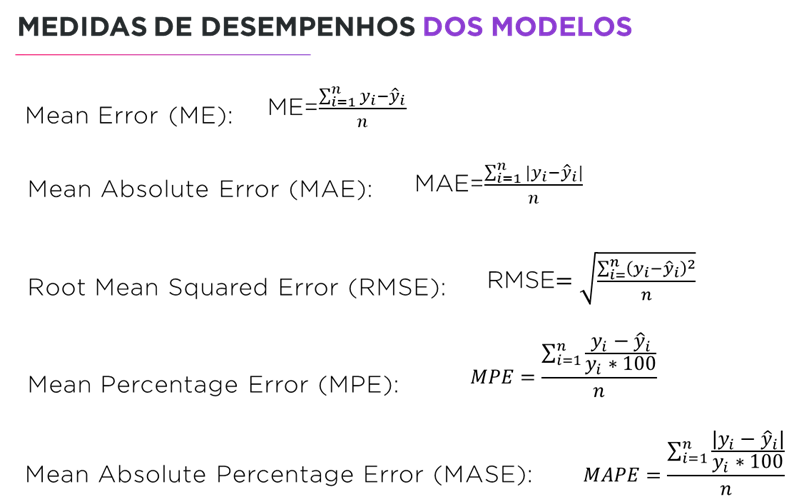

In [117]:
# Medidas de erro na amostra treino 
me1   = round((y_train-y_train_pred).mean(),2)
print('Erro Médio (Mean error-ME):', me1)
mae1  = round((mean_absolute_error(y_train, y_train_pred)),2)
print('Erro Médio Absoluto (Mean Absolut Error-MAE):', mae1) 
mse1  =round( (mean_squared_error(y_train, y_train_pred)),2)
print('Erro Quadrático Médio (Mean Squared Error-MSE)::', mse1) 
rmse1  = round((np.sqrt(mean_squared_error(y_train, y_train_pred))),2)
print('Raiz do Erro Quadrático Médio (Root Mean Squared Error-RMSE):', rmse1) 
mpe1  = round(((y_train - y_train_pred)/y_train).mean(),2)
print('Erro Percentual Médio (Mean Percent Error-MPE):', mpe1) 
mape1  =  round((mae1/y_train).mean(),2) 
print('Erro Percentual Absoluto Médio (Mean Absolut Percent Error-MAPE):', mape1) 

Erro Médio (Mean error-ME): 0.0
Erro Médio Absoluto (Mean Absolut Error-MAE): 33985.07
Erro Quadrático Médio (Mean Squared Error-MSE):: 1904343339.86
Raiz do Erro Quadrático Médio (Root Mean Squared Error-RMSE): 43638.78
Erro Percentual Médio (Mean Percent Error-MPE): -0.05
Erro Percentual Absoluto Médio (Mean Absolut Percent Error-MAPE): 0.25


In [119]:
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
 
pd.DataFrame({"treino":list1})

,treino
0,0.000000e+00
1,3.398507e+04
2,1.904343e+09
3,4.363878e+04
4,-5.000000e-02
5,2.500000e-01


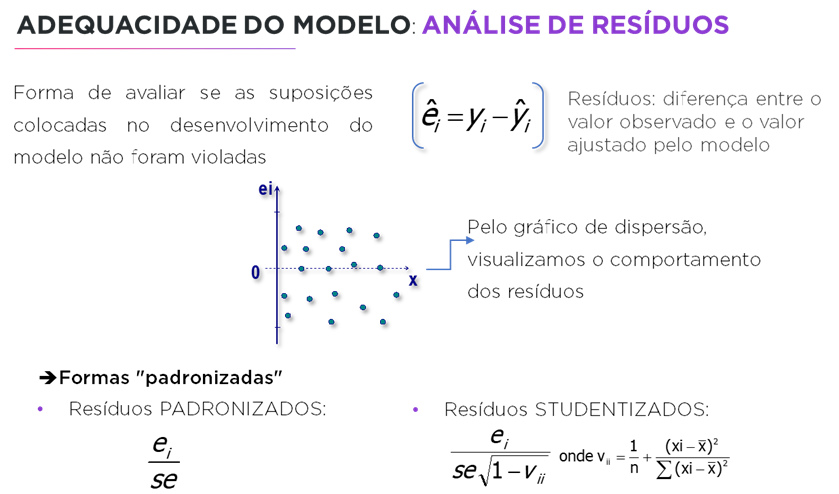

    Gráficos de Diagnóstico dos Resíduos
    
    => Residuals vs Fitted - indica a existência de padrões não lineares nos resíduos. Uma das suposições matemáticas na construção de um modelo usando Mínimos Quadrados é que os dados podem ser ajustados por uma linha. Se essa suposição for válida e os dados puderem ser ajustados por um modelo linear, uma linha aproximadamente horizontal sem padrões aparecerá no gráfico.

    => Normal Q-Q - examina se os resíduos são normalmente distribuídos. É bom que os pontos residuais sigam a linha reta.

    => Homoscedasticidade - verifica a homogeneidade de variância dos resíduos. A linha horizontal com pontos igualmente dispersos é uma boa indicação de homoscedasticidade.
  
    => Distância de Cook mede a diferença entre um modelo de regressão com determinada observação e um modelo sem aquela observação. 
    Ele faz isso para todas as observações e nos informa, portanto, o quanto cada caso influencia a estimativa do modelo

    Antes de se construir os gráficos, em primeiro construir-se-á o modelo de resíduo para cada diagnóstico.

In [121]:
# Construção de diagnóstico para os gráficos

modelo_ajust_y = model_fim.fittedvalues # Valores do modelo ajustados

modelo_residuos = model_fim.resid # Residuos

modelo_norm_resid = model_fim.get_influence().resid_studentized_internal # Residuos normalizados

modelo_norm_resid_abs = np.sqrt(np.abs(modelo_norm_resid)) # Quadrados dos residuos normalizados

modelo_outliers = model_fim.get_influence().hat_matrix_diag # Outliers

distancia_cook = model_fim.get_influence().cooks_distance[0] # Distancia de Cook


In [123]:
modelo_ajust_y

97     411289.841286
73     183290.796106
101    359133.802637
138    158609.380767
112    154595.794229
           ...      
57     295523.436828
150    154007.302765
134    119032.258952
143    401039.753741
111    149824.828492
Length: 163, dtype: float64

In [125]:
modelo_residuos

97     96070.158714
73    -27290.796106
101    39343.197363
138    25390.619233
112    13404.205771
           ...     
57    -74027.436828
150   -18007.302765
134      967.741048
143    41952.246259
111     4175.171508
Length: 163, dtype: float64

In [127]:
modelo_norm_resid 

array([ 2.2658018 , -0.6176079 ,  0.90192665,  0.57826246,  0.30324301,
        0.08733108, -2.65905328,  0.89056207,  0.21103679, -0.12178059,
        1.31893803,  0.95564402,  1.76059118, -0.79159888,  0.91507336,
        0.22104132, -1.64617778, -0.79426172, -0.73600286, -0.85429598,
        0.90899856, -0.62635707,  0.77066236,  0.96148945,  1.32919912,
        0.38497807, -1.04031764,  1.01815431,  0.51518754, -0.05990151,
        0.25130342, -0.3689997 ,  0.22329018,  0.79494144, -0.64852599,
        0.55375408, -0.45150593,  0.62685941,  0.57331132,  1.11697336,
       -1.43341515, -0.0691363 ,  0.04530721,  0.69791234, -0.58829223,
       -0.23305625,  0.04879424,  2.7218755 ,  0.40837794,  1.28224326,
       -0.86131139,  0.38325881,  1.34527586, -0.27041238,  0.74201239,
        0.97065315, -0.09020728, -0.24562223,  1.93901894,  0.80448011,
        0.51512327,  0.28093371,  1.79513341, -0.42446621, -0.22381731,
       -1.66536761,  0.70410937, -0.07873341,  0.98983159, -0.16

In [129]:
# um dataframe com a variável observado e estimado pelo modelo 

dataframe = pd.concat([y_train, modelo_ajust_y], axis=1)

In [131]:
dataframe

,Valor,0
97,507360,411289.841286
73,156000,183290.796106
101,398477,359133.802637
138,184000,158609.380767
112,168000,154595.794229
...,...,...
57,221496,295523.436828
150,136000,154007.302765
134,120000,119032.258952
143,442992,401039.753741


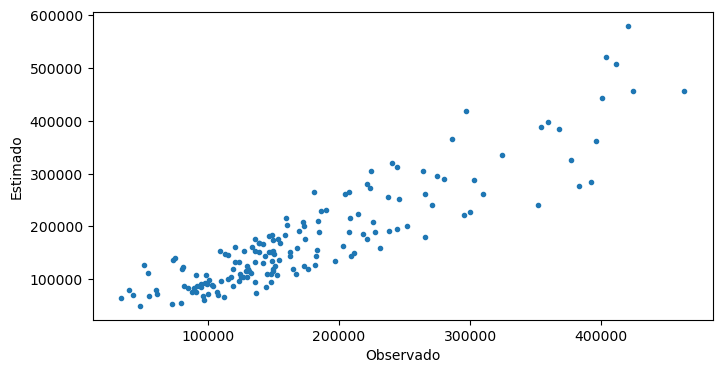

In [133]:
plt.figure(figsize=(8, 4))
plt.scatter(y_train_pred ,y_train, marker='.')
plt.xlabel("Observado")
plt.ylabel("Estimado");


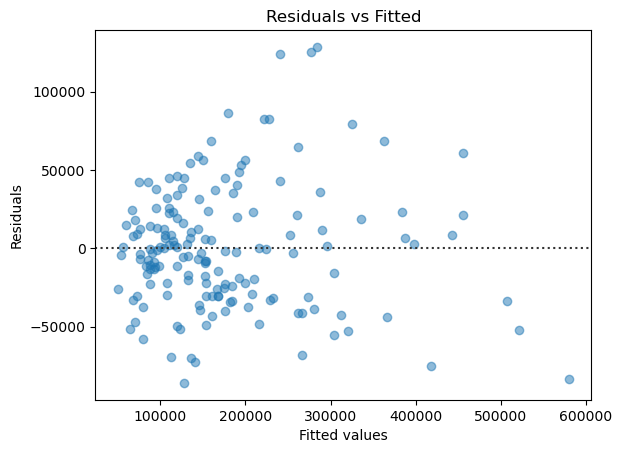

In [135]:
### Teste de Linearidade
### Nestes gráficos a presença de um padrão nos resíduos pode indicar um problema com algum aspecto do modelo linear.
plot_lm_1 = plt.figure()
plot_lm_1 = sb.residplot(data=dataframe, x=dataframe.columns[-0], y=modelo_ajust_y,     
            scatter_kws={'alpha': 0.5},       
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values') 
plt.ylabel('Residuals')
plt.show()   

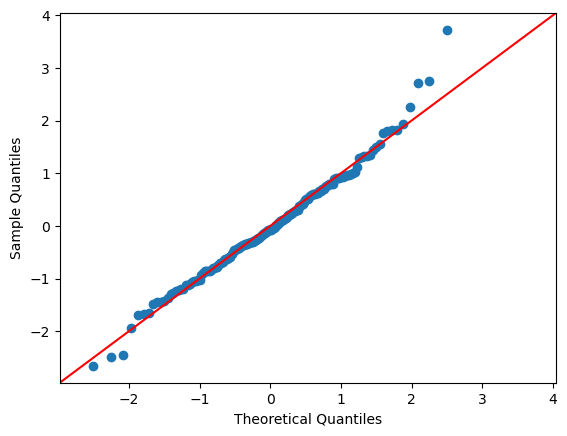

In [137]:
### Teste de Normalidade
### O gráfico de resíduos pode ser usado para verificar visualmente a suposição de normalidade.
### Sendo que para que se aceite que os resíduos estão normalmente distribuidos deve seguir aproximadamente uma linha reta.    
    
plot_lm_2  = sm.qqplot(modelo_norm_resid, line='45')
plt.show()
 

    Teste de normalidade dos resíduos Shapiro-Wilk Test Teste de hipótese:

    H0: Distribuição = Normal H1: Distribuição <> Normal

    Erro de decisâo: 0,05 ou 5%

    Critério de decisâo: 
        Se p-value < erro de decisão então rejeito H0.
        Se p-value >= erro de decisão então não rejeito H0

In [139]:
shapiro_test = stats.shapiro(modelo_norm_resid)
shapiro_test
#(statistic, p-value)

ShapiroResult(statistic=0.9870347868037513, pvalue=0.13593915098517462)

###     Qual a sua conclusão?
    

    Quando a analise de residuos revela que o modelo utilizado nao se ajusta aos dados de maneira satisfatoria, 
    existem estrategias que podem ser utilizadas para melhorar o ajuste:
    
    #. Transformacao de variaveis: Aplicar alguma funcao em Y, como logaritmo ou raiz quadrada.

    #. Adicao de termo quadrático: X^2

    #. Adicao de interacao entre variaveis: X1*X2

    #. Escolha de outro tipo de modelo linear: polinomial, segmentado, de efeitos aleatorios

    #. Outra escolha eh trabalhar com Regressoes Penalizadas(Ridge e Lasso)

    #. Escolha de outro tipo de modelo nao necessariamente linear: GLMs, modelos nao-lineares

    #. Escolha de outros algoritmos como Árvore de Regressão, SVM, KNN, Modelos Esemble, Redes Neurais



In [ ]:
como pontuar a base teste

In [141]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = model_fim.predict(X_test_sm)

In [143]:
y_pred

19     162759.937028
42     149294.608369
80     254789.322189
70      56141.672131
16     132969.883345
81      23853.226636
119    196813.999880
118    136152.866597
77     158511.674039
dtype: float64

## Regressão linear múltipla

## Utilizando a biblioteca scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


    O scikit-learn é uma biblioteca da linguagem Python desenvolvida especificamente para aplicação prática de machine learning.
    
    Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados, é reutilizável em diferentes situações, possui código aberto, sendo acessível a todos e foi construída sobre os pacotes NumPy, SciPy e matplotilib.
    
    Uma das melhores opções para aplicação prática de machine learning é através da linguagem Python.
    
    Um dos fatores que trás destaque a linguagem são justamente suas bibliotecas e pacotes, que proporcionam muita simplicidade as aplicações, além de garantir scripts descomplicados e eficientes. Dentre estes pacotes, temos o NumPy e o Pandas como os principais para a preparação dos dados, e o scikit-learn, ou apenas sklearn, sendo o mais utilizado para efetiva criação de modelos de machine learning.

In [145]:
#Separando os dados
# X = df.drop(['target'], axis = 1)

X = imoveis[['Area','Suites', 'IA', 'Semruido', 'Vista', 'Andar','AV100m','DistBM']]
y = imoveis[['Valor']] 

In [147]:
X

,Area,Suites,IA,Semruido,Vista,Andar,AV100m,DistBM
0,168,1,1,1,1,5,0,294
1,129,0,1,1,0,6,0,1505
2,218,1,1,0,0,8,1,251
3,180,1,12,0,0,4,0,245
4,120,1,15,1,0,3,0,956
...,...,...,...,...,...,...,...,...
167,82,0,14,1,0,2,0,485
168,134,0,11,1,1,2,1,827
169,135,2,9,1,1,3,1,414
170,141,2,1,0,0,6,0,305


In [149]:
X.columns

Index(['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m',
       'DistBM'],
      dtype='object')

In [151]:
# Regressão linear múltipla
from sklearn.linear_model import LinearRegression

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

In [153]:
from sklearn.model_selection import train_test_split

#Separando os dados de Treino e Teste
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 17)

In [155]:
#Treinando o Modelo
lr.fit(X_train,y_train)

LinearRegression()

In [157]:
# Primeiro, vamos olhar o Intercepto e os Coeficientes da Regressão.

print('Intercepto:', lr.intercept_)


Intercepto: [-32826.62650377]


In [159]:
print('Coeficientes:',lr.coef_)

Coeficientes: [[ 7.73747175e+02  3.47796351e+04 -1.24735263e+03  1.98022326e+04
   5.95749653e+04  5.08444528e+03 -2.28621109e+03 -3.77535768e+00]]


In [161]:
#coeff_df = pd.DataFrame(np.transpose(lr.coef_),X.columns,X.columns==['Coefficient'])
#coeff_df


coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients.columns=(['Variáveis','coefficients'])
 
coefficients

,Variáveis,coefficients
0,Area,773.747175
1,Suites,34779.635061
2,IA,-1247.352631
3,Semruido,19802.232565
4,Vista,59574.965321
5,Andar,5084.445280
6,AV100m,-2286.211095
7,DistBM,-3.775358


In [163]:
# Calculando o valor predito da variável resposta na amostra teste 
y_test_pred = lr.predict(X_test)

In [165]:
#Verificando o resultado
r_sq = lr.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.807457651085588


#### Performance do Modelo


In [167]:
# Importar a biblioteca
# Medidas de erro 
# Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
# Erro Quadrático Médio (MSE) é a média dos erros quadráticos
#Erro médio quadrático da raiz (RMSE) é a raiz quadrada da média dos erros quadráticos
# Utilizado quando vamos comparar vários modelos

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [169]:
# Calculando o valor predito da variável resposta na amostra treino  
y_test_pred = lr.predict(X_test)

In [171]:
y_test_pred

array([[164834.47932715],
       [152262.39840092],
       [255182.36479113],
       [ 58064.97148228],
       [133755.64757176],
       [ 25330.10850746],
       [193820.94431989],
       [136626.61298107],
       [159666.28425943]])

In [173]:
#Erro médio quadrático da raiz (RMSE) é a raiz quadrada da média dos erros quadráticos
rmse_Reg_lin  = (np.sqrt(mean_squared_error(y_test, y_test_pred))).round(2)

print('Erro médio quadrático:',rmse_Reg_lin )


Erro médio quadrático: 44723.19


####  A partir daqui testar de outros algoritmos 
    como Árvore de Regressão, SVMRegressor, KNNRegressor, Modelos Esemble para variáveis target numeríca , Redes Neurais 


    ==>Escolher qual o algoritmo tem o melhor desempenho: Menor erro quadrático médio 

    ==> Vale ressaltar que a escolha do algoritmo tem que ser realizado não somente com o desempenho mas também com o ambiente que será implementado e como será utilizado.

## Arvore de Regressão

In [175]:
# Import the necessary modules and libraries

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
 

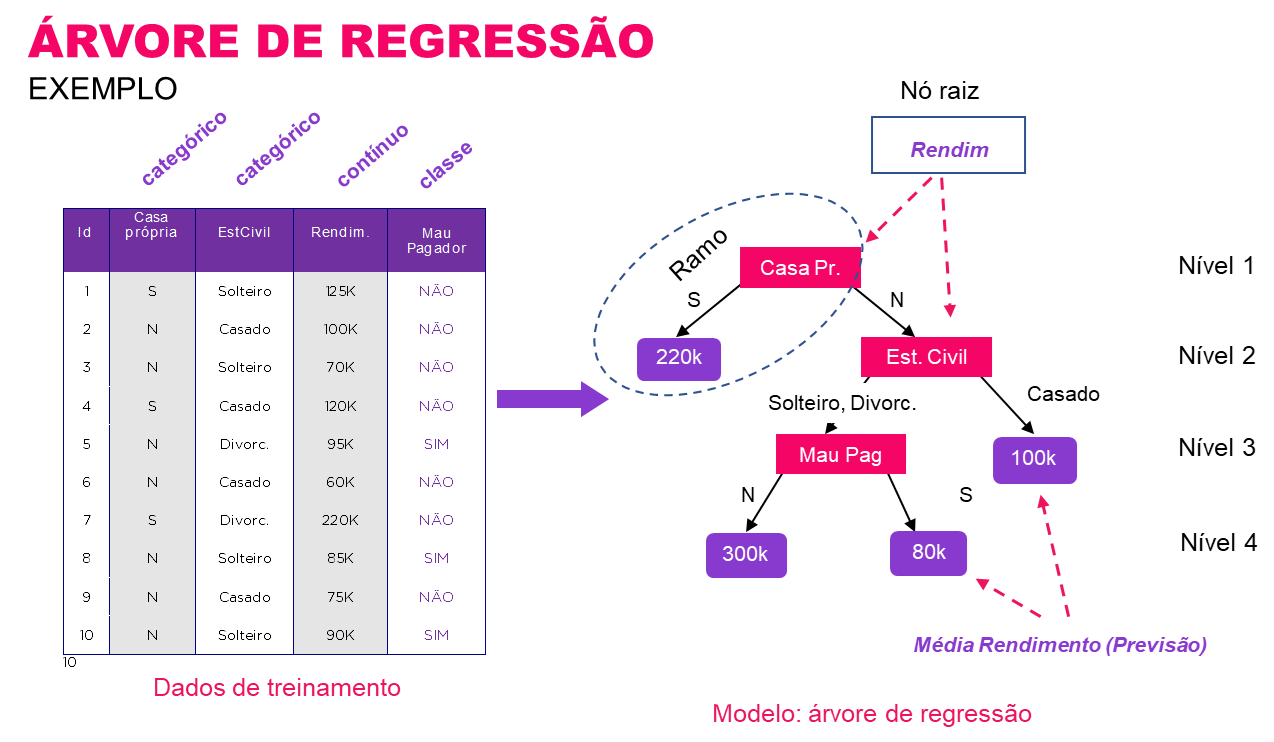!

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [177]:
# Importar as bibliotecas
from sklearn.model_selection import train_test_split

# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 17)

In [179]:
# Fit regression model
model_2 = DecisionTreeRegressor(max_depth=4,min_samples_split=10,random_state=17,criterion='squared_error')

In [181]:
model_2

DecisionTreeRegressor(max_depth=4, min_samples_split=10, random_state=17)

In [183]:
cols = X_train.columns

In [185]:
cols

Index(['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m',
       'DistBM'],
      dtype='object')

In [187]:
# Treinando o modelo de arvore de decisão:

model_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=10, random_state=17)

In [189]:
X_train

,Area,Suites,IA,Semruido,Vista,Andar,AV100m,DistBM
97,354,2,4,1,1,6,1,506
73,137,2,1,1,0,5,1,408
101,274,4,1,1,0,5,1,554
138,145,2,11,0,0,5,0,920
112,145,1,1,1,0,5,0,648
...,...,...,...,...,...,...,...,...
57,198,4,1,1,0,4,1,392
150,141,2,1,0,0,2,0,305
134,125,0,14,0,1,3,1,95
143,238,6,1,1,0,5,1,510


[Text(0.65, 0.9, 'Area <= 230.0\nsquared_error = 10131909449.577\nsamples = 163\nvalue = 175655.313'),
 Text(0.4, 0.7, 'Suites <= 1.5\nsquared_error = 3679988949.577\nsamples = 138\nvalue = 144616.645'),
 Text(0.2, 0.5, 'Area <= 132.0\nsquared_error = 1698555187.471\nsamples = 99\nvalue = 119257.232'),
 Text(0.1, 0.3, 'Area <= 87.5\nsquared_error = 645088508.832\nsamples = 48\nvalue = 93987.042'),
 Text(0.05, 0.1, 'squared_error = 123448888.889\nsamples = 6\nvalue = 67466.667'),
 Text(0.15, 0.1, 'squared_error = 604779019.413\nsamples = 42\nvalue = 97775.667'),
 Text(0.3, 0.3, 'IA <= 1.5\nsquared_error = 1523369573.898\nsamples = 51\nvalue = 143040.941'),
 Text(0.25, 0.1, 'squared_error = 1851342824.058\nsamples = 22\nvalue = 163822.182'),
 Text(0.35, 0.1, 'squared_error = 698406658.74\nsamples = 29\nvalue = 127275.862'),
 Text(0.6, 0.5, 'Area <= 147.5\nsquared_error = 2933300049.89\nsamples = 39\nvalue = 208990.538'),
 Text(0.5, 0.3, 'Vista <= 0.5\nsquared_error = 1155090627.206\nsamp

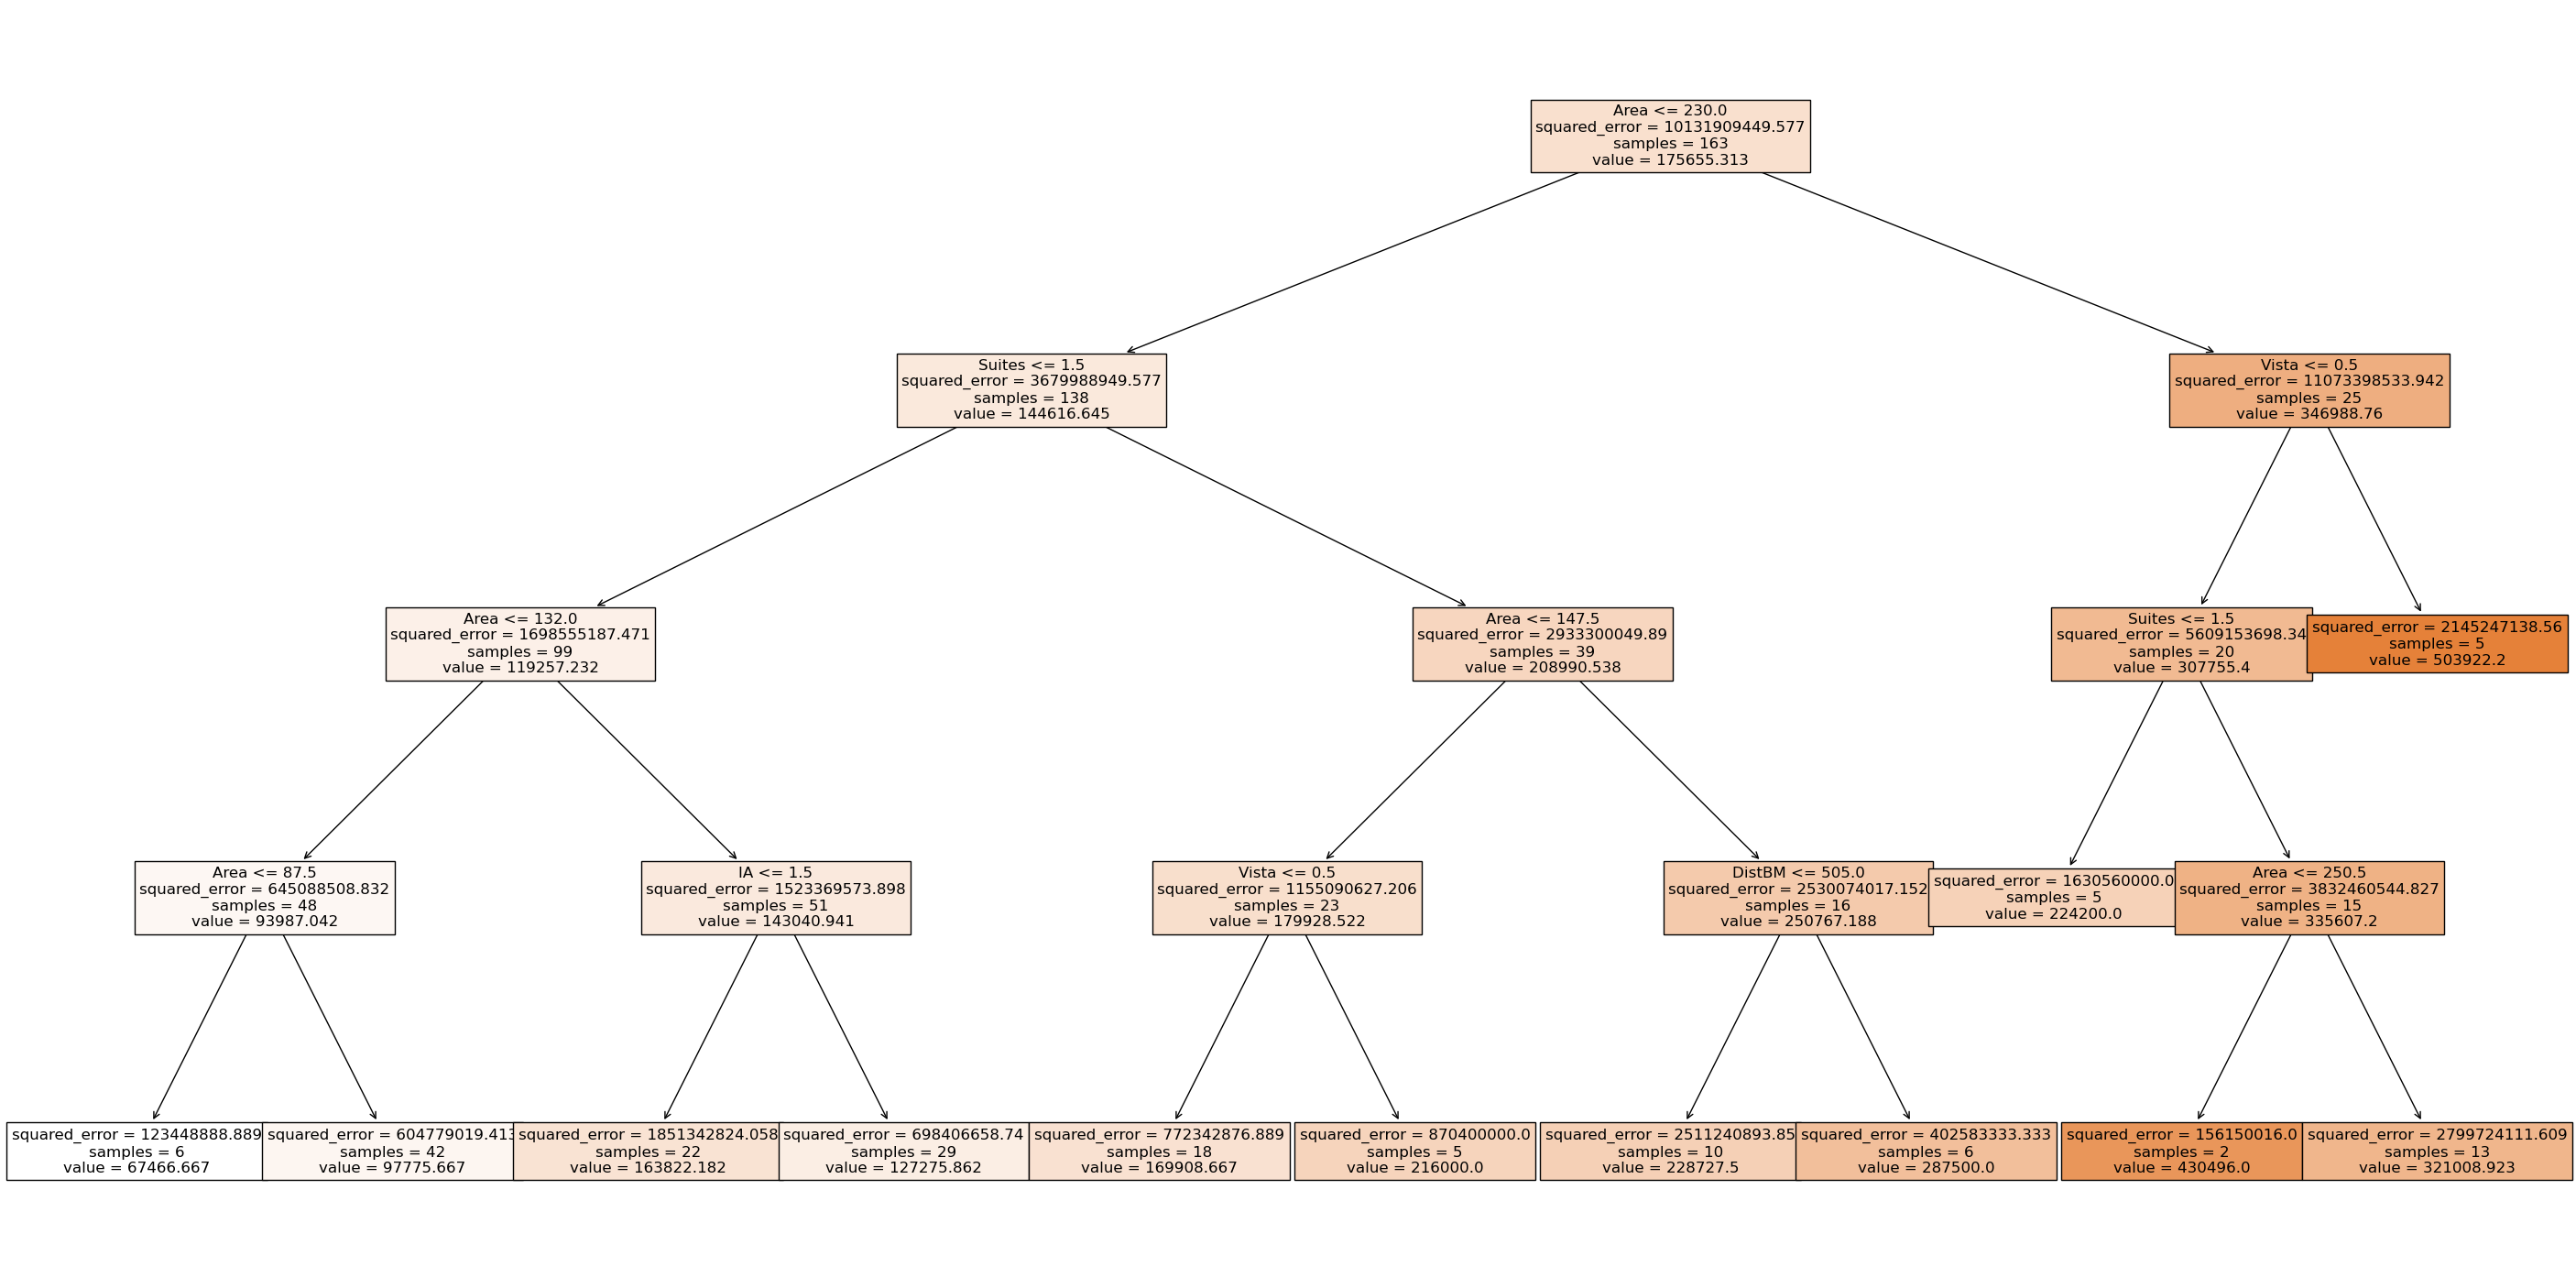

In [211]:

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
input_features=['Area','Suites', 'IA', 'Semruido', 'Vista', 'Andar','AV100m','DistBM']
fig = plt.figure(figsize=(36,18))
plot_tree(model_2, fontsize=12,filled=True, feature_names=input_features )

In [213]:
for caracteristica, score in zip(X_train, model_2.feature_importances_):
  print('caracteristica {} e Importância {}'.format(caracteristica, score*100))

caracteristica Area e Importância 68.30318400040412
caracteristica Suites e Importância 18.57996837642471
caracteristica IA e Importância 1.1420667764987416
caracteristica Semruido e Importância 0.0
caracteristica Vista e Importância 11.089393536859154
caracteristica Andar e Importância 0.0
caracteristica AV100m e Importância 0.0
caracteristica DistBM e Importância 0.8853873098132884


In [195]:
# Aplicando o algoritmo na base teste

y_test_regtree  = model_2.predict(X_test)

In [197]:
y_test_regtree

array([127275.86206897, 127275.86206897, 430496.        ,  97775.66666667,
       127275.86206897,  67466.66666667, 127275.86206897, 127275.86206897,
       127275.86206897])

In [199]:
y_test

,Valor
19,130000
42,90000
80,192000
70,70400
16,95000
81,40000
119,259000
118,189000
77,152000


In [201]:
#Erro médio quadrático da raiz (RMSE) é a raiz quadrada da média dos erros quadráticos
rmse_Arv_Regr  = (np.sqrt(mean_squared_error(y_test, y_test_regtree))).round(2)

print('Erro médio quadrático da Árvore de Regressão:',rmse_Arv_Regr  )


Erro médio quadrático da Árvore de Regressão: 95797.95


### lembrando .. e qual era da Regressão Linear?

In [203]:
#Erro médio quadrático da raiz (RMSE) é a raiz quadrada da média dos erros quadráticos
rmse_Reg_lin  = (np.sqrt(mean_squared_error(y_test, y_test_pred))).round(2)

print('Erro médio quadrático da Regressão Linear:',rmse_Reg_lin )


Erro médio quadrático da Regressão Linear: 44723.19
